<img src="https://www.sjtoyszone.com.au/media/product/0ef/intex-inflatable-gator-spray-splash-kids-pool-sjtoys-d34.jpg" width = 500>

# Et fatalt feiltrinn

## Live kodeeksempel fra forelesningen, 6. november 2018

### IN-KJM1900

---

Det n?rmer seg h?st, og et barnebasseng ($\mathbf{A}$) er glemt igjen p? plenen n?r kveldsm?rket senker seg.
<p></p>
Bunnventilen  er heldigvis ?pen slik at vannet har str?mmet ut ($Q_A$), og faren er derfor lav for at en vimsete natterangler skulle kunne snuble og bli v?t eller det som verre er...
<p></p>
...men det var f?r det begynte ? p?sregne.
</p></p>
Kan det regne nok til ? fylle opp bassenget selv om ventilen er ?pen? I dette eksempelet skal vi regne ut nettopp dette.

<h2> Randbetingelser og initialbetingelser</h2>

Str?mmen ut av bassenget er gitt som

$$Q_A = K_A \cdot A$$

med enheten $mm \cdot s^{-1}$, hvor $K_A = 0.0024 s^{-1}$.

Samtidig er det stadig varmt ute, og vannet i bassenget fordamper som

$$E_A = 0.001 mm \cdot s^{-1}$$

(dersom det er vann i bassenget).

Det p?sende regnet faller ned med 

$$P_A = .12 mm \cdot s^{-1}$$

Bassenget holder dessuten maksimalt $A_{max} = 30 mm$ vann, slik at overskytende str?m ut av bassenget er

\begin{equation}
Q_{over} = \max((A-A_{max})\delta t^{-1}, 0)
\end{equation}


<h2> En differensialligning for bassenget </h2>
<p></p>
Vi kan n? uttrykke vannstanden $A(t)$ i bassenget gjennom en differensialligning:
<p></p>
\begin{equation}
\frac{d}{dt} A(t) = P_A - E_A - Q_A - Q_{over} 
\end{equation}

<h2>Oppgavebeskrivelse</h2>
<p></p>
L?s ligningen numerisk for de gitte intial- og randbetingelsene, og avgj?r om bassenget utgj?r en fare for nabolaget.

---

# L?sning

1. Det aller f?rste vi m? gj?re er ? diskretisere tiden slik at for heltallig $i$:

$$t \rightarrow t_i = i \Delta t$$

2. Deretter benytter vi en numerisk derivert fremoverdifferanse for vannstanden $A(t)$:

$$ \frac{d}{dt} A(t) \approx \frac{A_{i+1} - A_i}{\Delta t} = P_A - E_A - Q_A - Q_{over}$$

3. Vi l?ser algebraisk for $A_{i+1}$:

$$ A_{i+1} = A_i + P_{A,i} \Delta t - E_{A,i} \Delta t - Q_{A,i} \Delta t - Q_{over,i} \Delta t$$

4. N? gjenst?r implementasjonen.

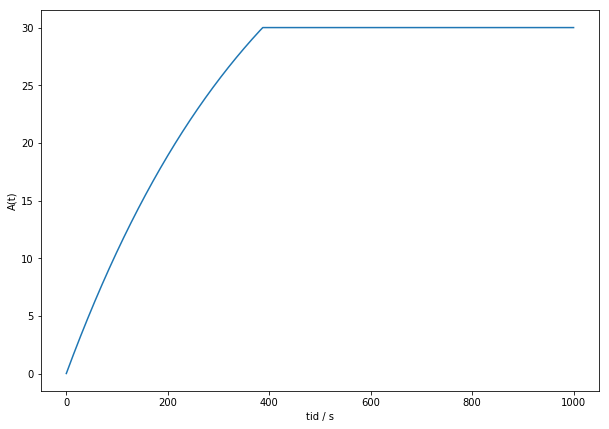

In [85]:
import numpy as np                # numpy for numerikk
import matplotlib.pyplot as plt   # matplotlib for visualisering


dt = 0.1   # steglengde i s

Nt = 10000 # antall tidssteg

t = np.linspace(0,Nt,Nt)*dt # diskret tidsakse

# Konstante st?rrelser, oppgitt i oppgaveteksten
P = 0.12    # nedb?r, mm/s, konstant
E = 0.001   # evaporasjon, mm/s, konstant
K = 0.0024  # ventilst?rrelse, s^-1, konstant
A_max = 30  # maxniv? i basseng, mm, konstant


A = np.zeros(Nt, dtype = float)      # Vannstand i bassenget A(t)
Q_A = np.zeros(Nt, dtype = float)    # Str?m ut av bassenget Q_A(t)
Q_over = np.zeros(Nt, dtype = float) # Overskytende vannstr?m n?r bassenget er fullt Q_over(t)


#implementasjon
for i in np.arange(Nt-1):
    Q_A[i] = K*A[i] #beregner str?m ut fra basseng
    Q_over[i] = np.maximum((A[i]-A_max)/dt, 0) #overslagsvann
    A[i+1] = A[i] + P*dt - E*dt - Q_A[i]*dt - Q_over[i]*dt # oppdateringsskjema
    
#plott resultater
plt.figure(1, figsize = (10,7))
plt.plot(t, A)
plt.xlabel("tid / s")
plt.ylabel("A(t)")

plt.show()

    
